<a href="https://colab.research.google.com/github/Sohaib90/Pytorch-projects-uni-random-/blob/master/Hiwi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [0]:
from fastai.vision import *
from fastai import *
from fastai.metrics import error_rate
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
!unzip imgs.zip

In [0]:
import numpy as np
np.random.seed(42)
data = ImageDataBunch.from_folder("/content/images/", train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [34]:
len(data.train_ds)

1275

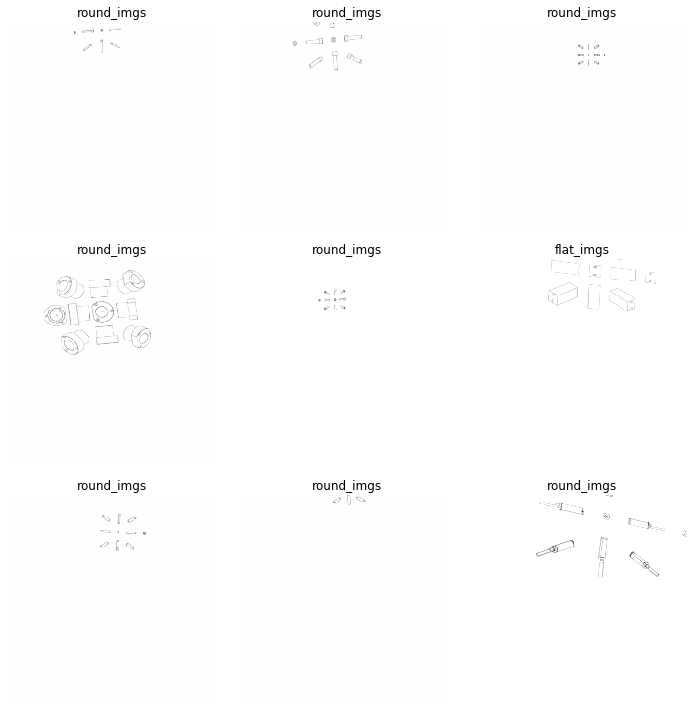

In [35]:
data.show_batch(rows=3, figsize=(10,10))

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=[error_rate, accuracy])

In [16]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.856256,4.821136,0.889937,0.110063,02:38
1,0.557514,5.881757,0.842767,0.157233,02:38
2,0.404775,1.095817,0.487421,0.512579,02:38
3,0.301962,0.085398,0.015723,0.984277,02:37
4,0.256038,0.071200,0.015723,0.984277,02:38


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [19]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


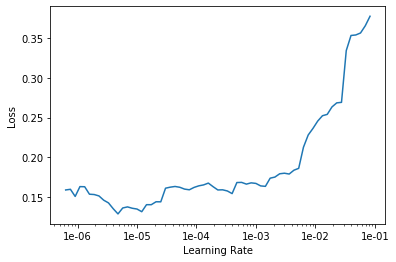

In [20]:
learn.recorder.plot()

In [21]:
learn.fit_one_cycle(3, max_lr=slice(1e-6,5e-4))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.180573,0.044143,0.006289,0.993711,02:37
1,0.155238,0.048340,0.006289,0.993711,02:40
2,0.142179,0.053045,0.009434,0.990566,02:39


In [0]:
learn.save('stage-2')

In [0]:
learn.load('stage-2');

In [24]:
interp = ClassificationInterpretation.from_learner(learn)

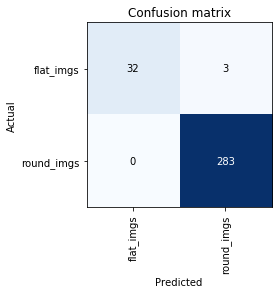

In [25]:
interp.plot_confusion_matrix()

In [0]:
img = open_image("/content/out.jpg")

In [27]:
learn.predict(img)

(Category round_imgs, tensor(1), tensor([0.0024, 0.9976]))

In [0]:
img = open_image("/content/flat_out.png")

In [29]:
learn.predict(img)

(Category flat_imgs, tensor(0), tensor([9.9999e-01, 1.2062e-05]))